In [ ]:
%matplotlib inline


# Comparison of XGBRegressor with different transformations


In [1]:

from ai4water.datasets import busan_beach
from ai4water.utils.utils import get_version_info
from ai4water.experiments import TransformationExperiments
from ai4water.hyperopt import Categorical, Integer, Real
from ai4water.utils.utils import dateandtime_now


for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 05:59:00) [MSC v.1929 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
tcn version: 3.5.0
xgboost version: 1.7.0
easy_mpl version: 0.21.3
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.22.2
pandas version: 1.5.1
matplotlib version: 3.6.1
h5py version: 3.6.0
sklearn version: 1.1.3
xarray version: 0.21.1


D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data = busan_beach()
input_features = data.columns.tolist()[0:-1]
output_features = data.columns.tolist()[-1:]

In [3]:
class MyTransformationExperiments(TransformationExperiments):

    def update_paras(self, **kwargs):

        y_transformation = kwargs.pop('y_transformation')
        if y_transformation == "none":
            y_transformation = None

        return {
            'model': {"XGBRegressor": kwargs},
            'y_transformation': y_transformation
        }

In [4]:
cases = {
    'model_None': {'y_transformation': 'none'},
    'model_minmax': {'y_transformation': 'minmax'},
    'model_zscore': {'y_transformation': 'zscore'},
    'model_center': {'y_transformation': 'center'},
    'model_scale': {'y_transformation': 'scale'},
    'model_robust': {'y_transformation': 'robust'},
    'model_quantile': {'y_transformation': 'quantile'},
    'model_box_cox': {'y_transformation': {'method': 'box-cox', 'treat_negatives': True, 'replace_zeros': True}},
    'model_yeo-johnson': {'y_transformation': 'yeo-johnson'},
    'model_sqrt': {'y_transformation': 'sqrt'},
    'model_log': {'y_transformation': {'method':'log', 'treat_negatives': True, 'replace_zeros': True}},
    'model_log10': {'y_transformation': {'method':'log10', 'treat_negatives': True, 'replace_zeros': True}},
    "model_pareto": {"y_transformation": "pareto"},
    "model_vast": {"y_transformation": "vast"},
    "model_mmad": {"y_transformation": "mmad"}
         }

In [5]:
num_samples=10
search_space = [
# maximum number of trees that can be built
Integer(low=10, high=30, name='iterations', num_samples=num_samples),
# Used for reducing the gradient step.
Real(low=0.09, high=0.3, prior='log-uniform', name='learning_rate', num_samples=num_samples),
# Coefficient at the L2 regularization term of the cost function.
Real(low=0.5, high=5.0, name='l2_leaf_reg', num_samples=num_samples),
# arger the value, the smaller the model size.
Real(low=0.1, high=10, name='model_size_reg', num_samples=num_samples),
# percentage of features to use at each split selection, when features are selected over again at random.
Real(low=0.1, high=0.5, name='rsm', num_samples=num_samples),
# number of splits for numerical features
Integer(low=32, high=50, name='border_count', num_samples=num_samples),
# The quantization mode for numerical features.  The quantization mode for numerical features.
Categorical(categories=['Median', 'Uniform', 'UniformAndQuantiles',
                        'MaxLogSum', 'MinEntropy', 'GreedyLogSum'], name='feature_border_type')
]

In [6]:
x0 = [10, 0.11, 1.0, 1.0, 0.2, 45, "Uniform"]

In [7]:
experiment = MyTransformationExperiments(
    cases=cases,
    input_features=input_features,
    output_features = output_features,
    param_space=search_space,
    x0=x0,
    verbosity=0,
    split_random=True,
    exp_name = f"xgb_y_exp_{dateandtime_now()}",
    save=False
)

In [8]:
experiment.fit(data = data, run_type='dry_run')


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)
running  None model
[21:37:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  minmax model
[21:37:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  zscore model
[21:37:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  center model
[21:37:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  scale model
[21:37:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  robust model
[21:37:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  quantile model
[21:37:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.

running  box_cox model
[21:37:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.

running  yeo-johnson model
[21:37:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.

running  sqrt model
[21:37:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-a

D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  vast model
[21:37:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


running  mmad model
[21:38:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "feature_border_type", "iterations", "l2_leaf_reg", "model_size_reg", "rsm" } are not used.



D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
D:\C\Anaconda3\envs\ai4w_exp_py38\lib\site-packages\scipy\stats\_stats_py.py:310: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


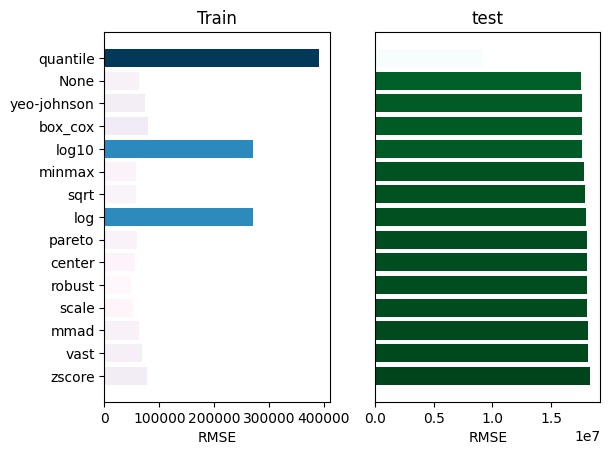

In [9]:
_ = experiment.compare_errors('rmse', data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


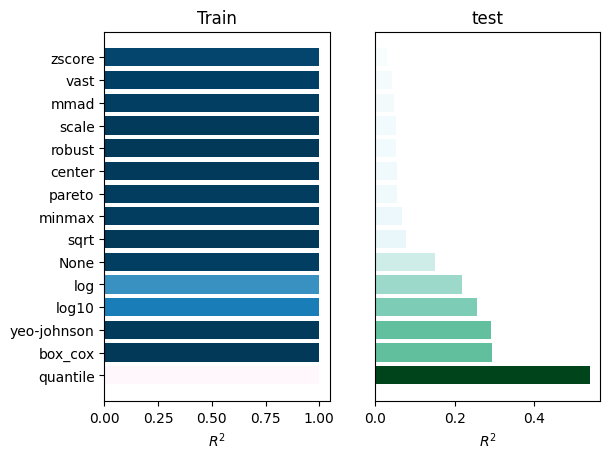

In [10]:
_ = experiment.compare_errors('r2', data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


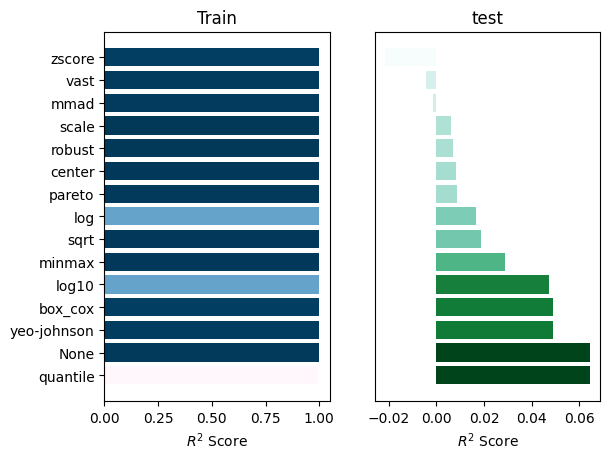

In [11]:
_ = experiment.compare_errors('r2_score', data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


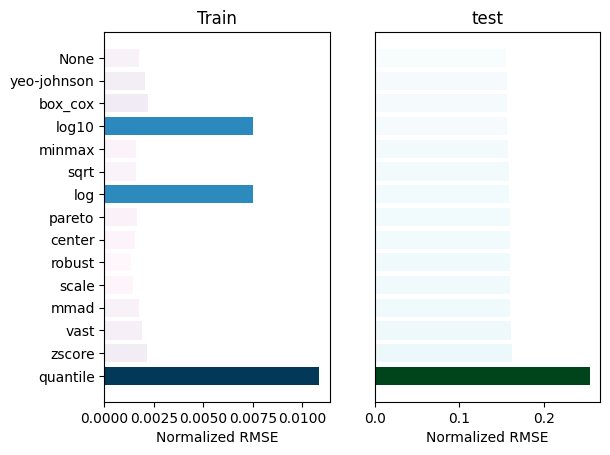

In [12]:
_ = experiment.compare_errors('nrmse', data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


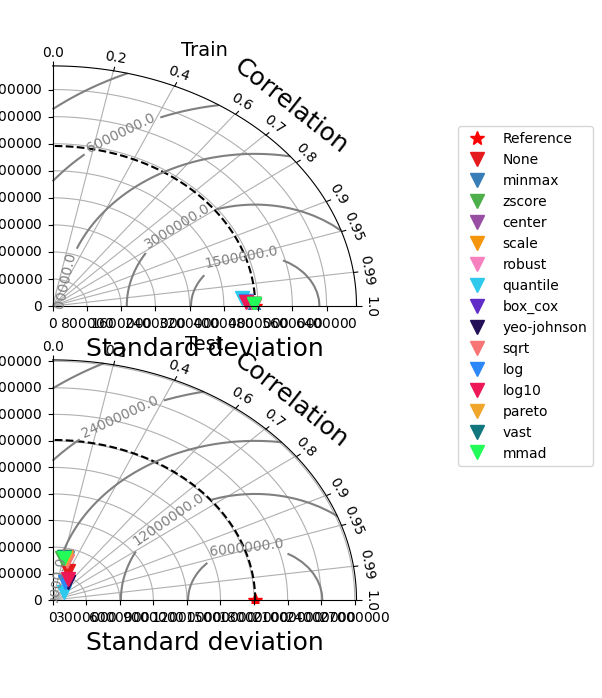

In [17]:
_ = experiment.taylor_plot(data=data, figsize=(4, 7),
                          leg_kws=dict(bbox_to_anchor=(1.5, 0.8)))


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


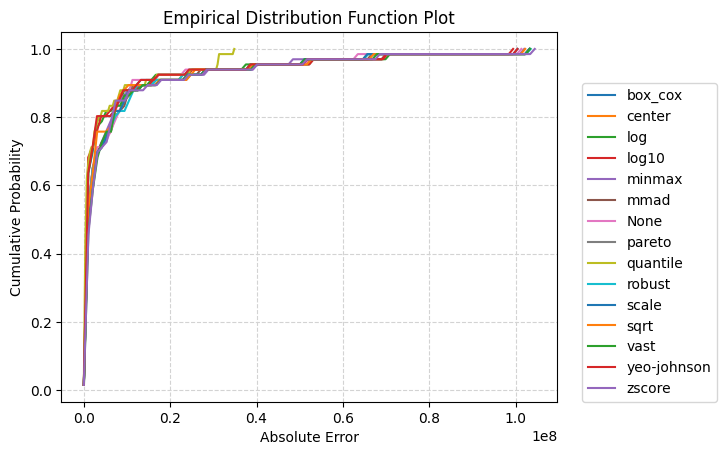

In [18]:
_ = experiment.compare_edf_plots(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


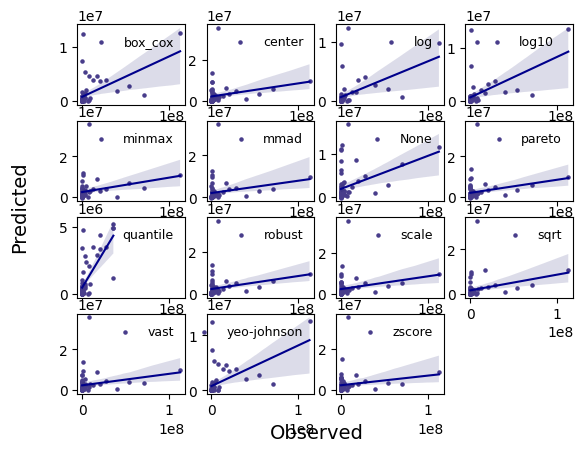

In [19]:
_ = experiment.compare_regression_plots(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)


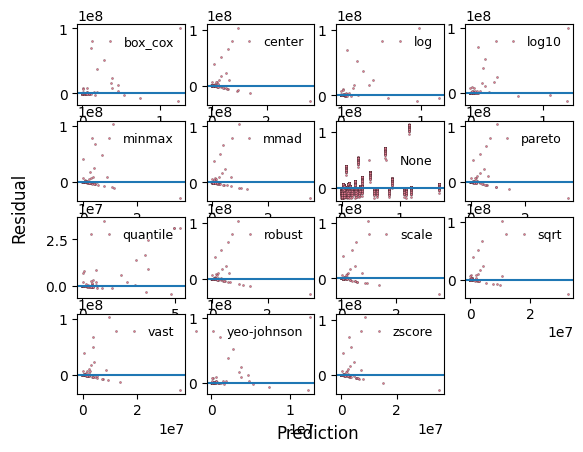

In [20]:
_ = experiment.compare_residual_plots(data=data)